In [3]:
import pandas as pd
weather = pd.read_csv('Resources/cities.csv')
#weather_df = weather_df.set_index("City")

In [34]:
weather_df= pd.DataFrame(weather)
print(weather_df.head())

   City_ID          City  Cloudiness Country        Date  Humidity    Lat  \
0        0  jacareacanga           0      BR  1528902000        62  -6.22   
1        1    kaitangata         100      NZ  1528905304        94 -46.28   
2        2      goulburn          20      AU  1528905078        91 -34.75   
3        3          lata          76      IN  1528905305        89  30.78   
4        4    chokurdakh           0      RU  1528905306        88  70.62   

      Lng  Max Temp  Wind Speed  
0  -57.76     89.60        6.93  
1  169.85     42.61        5.64  
2  149.72     44.32       10.11  
3   78.62     59.89        0.94  
4  147.90     32.17        2.95  


In [30]:
temps = weather_df['Max Temp'].tolist()
lons = weather_df['Lng'].tolist()
lats= weather_df['Lat'].tolist()

/Users/ghassan/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch


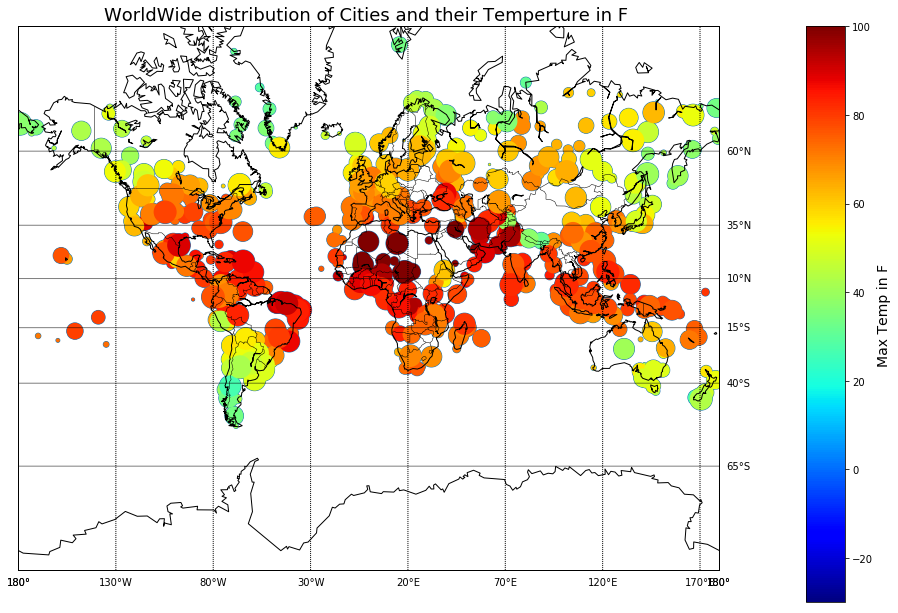

In [33]:
# Define the projection, scale, the corners of the map, and the resolution.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
plt.figure(figsize=(18,10))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawcountries()
#m.drawstates()
# draw parallels and meridians.
parallels = np.arange(-90.,91.,25.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[False,True,True,False])
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,50.)
m.drawmeridians(meridians,labels=[True,False,False,True])
m.drawmapboundary(fill_color='white')
plt.title("WorldWide distribution of Cities and their Temperture in F ", fontsize=18)
# Color the transformed points!
x,y =m(lons,lats)
s = [n for n in range(len(weather_df['Max Temp']))]
plt.scatter(x,y,s=s)

#sc = plt.scatter(weather_df['Lng'],weather_df['Lat'], c=weather_df['Max Temp'], vmin=-30, vmax =100, cmap=cm.jet, s=10, edgecolors='none')
sc = plt.scatter(x,y, c=weather_df['Max Temp'], vmin=-30, vmax =100, cmap=cm.jet, s=s, edgecolors='none')# And let's include that colorbar
cax = plt.axes([0.85, 0.08, 0.030, 0.8])
clb=plt.colorbar(sc,cax=cax)
clb.set_label('Max Temp in F', fontsize=14 )
plt.savefig("ww_temp_dist.png", dpi = 100)
plt.show()